In [1]:
import polars as pl
import pandas as pd
import os
os.chdir("../..")

In [2]:
%%time
edf = (
    pl.scan_parquet("test_result.parquet/*")
    .filter(pl.col("make").is_in(["VOLVO", "VOLKSWAGEN"]))
    .filter(pl.col("model").is_in(["V50", "PASSAT"]))
    .group_by("vehicle_id")
    .agg(
        pl.col(
            "make", "model", "fuel_type", "cylinder_capacity", "first_use_date"
        ).last(),
        pl.col("test_date").max().alias("last_test_date"),
        pl.col("test_mileage").max().alias("last_known_mileage"),
    )
    .collect()
)

CPU times: user 1min 32s, sys: 15.8 s, total: 1min 47s
Wall time: 10.1 s


In [3]:
edf.head()

vehicle_id,make,model,fuel_type,cylinder_capacity,first_use_date,last_test_date,last_known_mileage
i64,str,str,str,i64,datetime[μs],datetime[μs],i64
482606384,"""VOLVO""","""V50""","""DI""",1998,2007-12-21 00:00:00,2022-12-09 00:00:00,144291
848221070,"""VOLKSWAGEN""","""PASSAT""","""DI""",1968,2012-07-24 00:00:00,2015-07-20 00:00:00,79752
1124645423,"""VOLKSWAGEN""","""PASSAT""","""DI""",1598,2015-06-15 00:00:00,2021-11-02 00:00:00,95098
648787416,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,1998-12-31 00:00:00,2011-09-09 00:00:00,160352
1044020526,"""VOLKSWAGEN""","""PASSAT""","""PE""",1984,2002-07-02 00:00:00,2016-11-16 00:00:00,97251


In [4]:
len(edf)

604023

In [5]:
edf.schema

OrderedDict([('vehicle_id', Int64),
             ('make', Utf8),
             ('model', Utf8),
             ('fuel_type', Utf8),
             ('cylinder_capacity', Int64),
             ('first_use_date', Datetime(time_unit='us', time_zone=None)),
             ('last_test_date', Datetime(time_unit='us', time_zone=None)),
             ('last_known_mileage', Int64)])

In [6]:
ldf = (
    pl.scan_parquet("test_result.parquet/*")
    .filter(pl.col("make").is_in(["VOLVO", "VOLKSWAGEN"]))
    .filter(pl.col("model").is_in(["V50", "PASSAT"]))
    .group_by("vehicle_id")
    .agg(
        pl.col(
            "make", "model", "fuel_type", "cylinder_capacity", "first_use_date"
        ).last(),
        pl.col("test_date").max().alias("last_test_date"),
        pl.col("test_mileage").max().alias("last_known_mileage"),
    )
)

In [7]:
%%time
# 5m22s
# 4m44s
edf1 = ldf.collect(streaming=True)

CPU times: user 1min 44s, sys: 7.08 s, total: 1min 51s
Wall time: 31.3 s


In [8]:
%%time
# xmxxs
edf2 = ldf.collect()

CPU times: user 1min 29s, sys: 18.4 s, total: 1min 47s
Wall time: 10.6 s


In [9]:
edf = edf2

In [10]:
edf.head()

vehicle_id,make,model,fuel_type,cylinder_capacity,first_use_date,last_test_date,last_known_mileage
i64,str,str,str,i64,datetime[μs],datetime[μs],i64
125365778,"""VOLKSWAGEN""","""PASSAT""","""DI""",1900,1999-09-14 00:00:00,2013-06-27 00:00:00,143262
143024862,"""VOLKSWAGEN""","""PASSAT""","""PE""",1781,2001-03-01 00:00:00,2013-02-11 00:00:00,143215
374348937,"""VOLKSWAGEN""","""PASSAT""","""DI""",1968,2016-10-18 00:00:00,2022-10-19 00:00:00,81640
1179375740,"""VOLKSWAGEN""","""PASSAT""","""DI""",1781,2004-03-11 00:00:00,2022-10-03 00:00:00,194454
981318700,"""VOLKSWAGEN""","""PASSAT""","""DI""",1968,2008-12-16 00:00:00,2022-02-04 00:00:00,192782


In [11]:
ldf.schema

OrderedDict([('vehicle_id', Int64),
             ('make', Utf8),
             ('model', Utf8),
             ('fuel_type', Utf8),
             ('cylinder_capacity', Int64),
             ('first_use_date', Datetime(time_unit='us', time_zone=None)),
             ('last_test_date', Datetime(time_unit='us', time_zone=None)),
             ('last_known_mileage', Int64)])

In [12]:
#ldf.with_columns(('lifetime', pl.col('last_test_date') - pl.col('first_use_date')))
ldf.with_columns((pl.col('last_test_date') - pl.col('first_use_date')).alias('lifetime'))

<LazyFrame [9 cols, {"vehicle_id": Int64 … "lifetime": Duration(time_unit='us')}] at 0x7F1817D49E50>

In [13]:
%%time
edf = ldf.collect()

CPU times: user 1min 28s, sys: 17.8 s, total: 1min 46s
Wall time: 10.7 s


In [14]:
edf.schema

OrderedDict([('vehicle_id', Int64),
             ('make', Utf8),
             ('model', Utf8),
             ('fuel_type', Utf8),
             ('cylinder_capacity', Int64),
             ('first_use_date', Datetime(time_unit='us', time_zone=None)),
             ('last_test_date', Datetime(time_unit='us', time_zone=None)),
             ('last_known_mileage', Int64)])

In [15]:
edf.with_columns((pl.col('last_test_date') - pl.col('first_use_date')).alias('lifetime'))

vehicle_id,make,model,fuel_type,cylinder_capacity,first_use_date,last_test_date,last_known_mileage,lifetime
i64,str,str,str,i64,datetime[μs],datetime[μs],i64,duration[μs]
996790202,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2001-09-07 00:00:00,2018-09-05 00:00:00,278876,6207d
742702646,"""VOLKSWAGEN""","""PASSAT""","""PE""",1984,2002-06-11 00:00:00,2022-07-15 00:00:00,79865,7339d
700225292,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2005-10-28 00:00:00,2016-01-07 00:00:00,170467,3723d
634827688,"""VOLKSWAGEN""","""PASSAT""","""PE""",1984,1991-12-31 00:00:00,2006-10-09 00:00:00,123402,5396d
731275752,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,1997-11-03 00:00:00,2020-11-28 00:00:00,158951,8426d
1489503628,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2001-07-09 00:00:00,2014-11-11 00:00:00,141859,4873d
1196003376,"""VOLKSWAGEN""","""PASSAT""","""DI""",1896,2000-06-29 00:00:00,2014-04-26 00:00:00,225071,5049d
900980861,"""VOLKSWAGEN""","""PASSAT""","""DI""",1598,2012-09-28 00:00:00,2015-10-31 00:00:00,42160,1128d
575907251,"""VOLKSWAGEN""","""PASSAT""","""DI""",1598,2016-10-21 00:00:00,2022-06-20 00:00:00,74849,2068d


In [16]:
vehicle_summary_pdf = (
    edf
    .with_columns((pl.col('last_test_date') - pl.col('first_use_date')).alias('lifetime'))
    .to_pandas()
)

vehicle_summary_pdf['lifetime'] = vehicle_summary_pdf.lifetime.dt.days / 365

In [17]:
#vehicle_summary_pdf["test_date"] = pd.to_datetime(vehicle_summary_pdf["test_date"])
#vehicle_summary_pdf["first_use_date"] = pd.to_datetime(
#    vehicle_summary_pdf["first_use_date"]
#)
vehicle_summary_pdf["surviving"] = vehicle_summary_pdf["last_test_date"] >= pd.Timestamp(
    "2022-01-01"
)
vehicle_summary_pdf["surviving_colour"] = vehicle_summary_pdf.surviving.map(
    {True: "blue", False: "red"}
)
vehicle_summary_pdf["fuel_colour"] = vehicle_summary_pdf.fuel_type.map(
    {"DI": "black", "PE": "blue", "HY": "green"}
)
vehicle_summary_pdf

,vehicle_id,make,model,fuel_type,cylinder_capacity,first_use_date,last_test_date,last_known_mileage,lifetime,surviving,surviving_colour,fuel_colour
0,996790202,VOLKSWAGEN,PASSAT,DI,1896.0,2001-09-07,2018-09-05,278876.0,17.005479,False,red,black
1,742702646,VOLKSWAGEN,PASSAT,PE,1984.0,2002-06-11,2022-07-15,79865.0,20.106849,True,blue,blue
2,700225292,VOLKSWAGEN,PASSAT,DI,1896.0,2005-10-28,2016-01-07,170467.0,10.200000,False,red,black
3,634827688,VOLKSWAGEN,PASSAT,PE,1984.0,1991-12-31,2006-10-09,123402.0,14.783562,False,red,blue
4,731275752,VOLKSWAGEN,PASSAT,DI,1896.0,1997-11-03,2020-11-28,158951.0,23.084932,False,red,black
...,...,...,...,...,...,...,...,...,...,...,...,...
604018,315031047,VOLKSWAGEN,PASSAT,DI,1968.0,2019-04-11,2022-04-12,50779.0,3.005479,True,blue,black
604019,1413852377,VOLKSWAGEN,PASSAT,DI,1968.0,2014-09-29,2022-09-01,25289.0,7.928767,True,blue,black
604020,214965008,VOLKSWAGEN,PASSAT,DI,1896.0,2002-02-12,2013-09-28,179270.0,11.632877,False,red,black
604021,214026234,VOLVO,V50,DI,1997.0,2009-10-09,2022-07-20,33132.0,12.786301,True,blue,black


In [18]:
passats_df = (
    vehicle_summary_pdf.assign(year=vehicle_summary_pdf.first_use_date.dt.year)
    .query('model == "PASSAT" & fuel_type == "PE" & cylinder_capacity == 1798')
    .query("1997 <= year <= 2001")
)

passats_df

,vehicle_id,make,model,fuel_type,cylinder_capacity,first_use_date,last_test_date,last_known_mileage,lifetime,surviving,surviving_colour,fuel_colour,year
9,768533384,VOLKSWAGEN,PASSAT,PE,1798.0,1999-12-31,2013-09-30,145811.0,13.758904,False,red,blue,1999.0
59,735236582,VOLKSWAGEN,PASSAT,PE,1798.0,2000-03-10,2022-09-08,113005.0,22.512329,True,blue,blue,2000.0
199,652862580,VOLKSWAGEN,PASSAT,PE,1798.0,1998-12-15,2016-04-25,145799.0,17.372603,False,red,blue,1998.0
237,1184415500,VOLKSWAGEN,PASSAT,PE,1798.0,2000-03-30,2012-09-03,125523.0,12.438356,False,red,blue,2000.0
629,37592952,VOLKSWAGEN,PASSAT,PE,1798.0,1999-02-19,2020-02-11,124438.0,20.991781,False,red,blue,1999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
603293,716276504,VOLKSWAGEN,PASSAT,PE,1798.0,2000-05-17,2015-03-19,216211.0,14.846575,False,red,blue,2000.0
603746,702201400,VOLKSWAGEN,PASSAT,PE,1798.0,2000-01-28,2016-01-09,181570.0,15.958904,False,red,blue,2000.0
603758,338292994,VOLKSWAGEN,PASSAT,PE,1798.0,1998-12-29,2013-01-16,220361.0,14.060274,False,red,blue,1998.0
603913,1154516794,VOLKSWAGEN,PASSAT,PE,1798.0,1997-12-31,2015-04-21,131155.0,17.315068,False,red,blue,1997.0


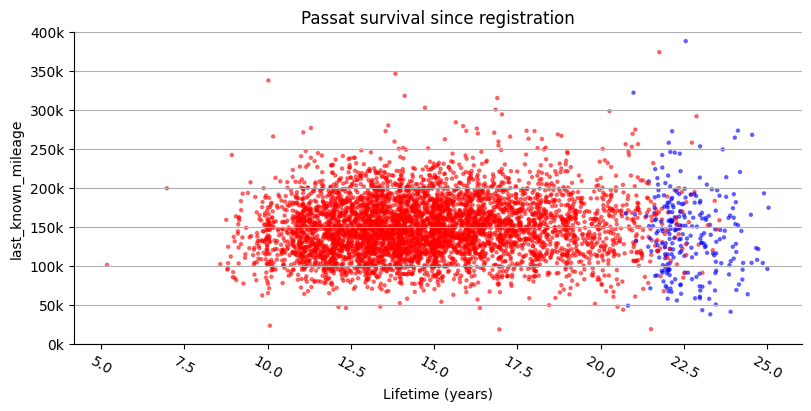

In [19]:
from simpler_mpl import set_common_mpl_styles, set_commas
import matplotlib.pyplot as plt

fig, ax = plt.subplots(constrained_layout=True)

passats_df.dropna().plot.scatter(
    figsize=(8, 4),
    x="lifetime",
    y="last_known_mileage",
    marker=".",
    alpha=0.5,
    # s=0.5,
    c="surviving_colour",
    ax=ax
)
#ax.set_xlim(5, 26)
ax.set_ylim(0, 400000)
#ax.plot(result["test_date"], result["passed"])  # , marker='o')
ax.yaxis.set_major_formatter(lambda x, pos: f"{int(x/1000):,}k")
plt.xticks(rotation=-30)
set_common_mpl_styles(
    ax, title="Passat survival since registration", ymin=0, xlabel="Lifetime (years)" #ylabel="Passing Tests per Week"
)
